In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import powerlaw
import matplotlib.pyplot as plt
import multiprocessing as mp
import pickle
from tqdm import tqdm

Mean degree: 9.995
Calculating best minimal value for power law fit
Estimated power law exponent: 2.82887146988854


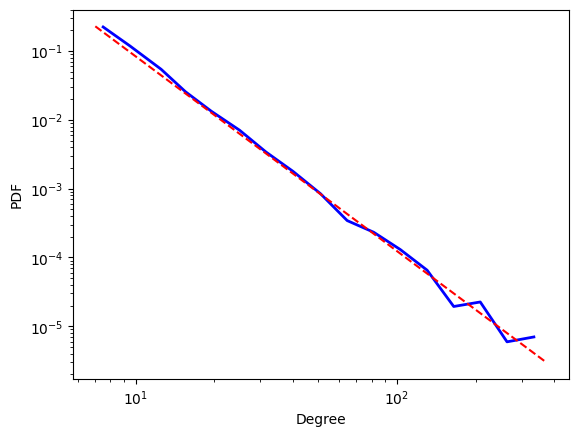

In [22]:
# Parameters for the scale-free network
alpha = 0.2  # Probability of adding a new node connected to an existing node (in-degree)
beta = 0.7 # Probability of adding an edge between two existing nodes
gamma = 0.1  # Probability of adding a new node connected to an existing node (out-degree)

# Generate the network
#g = nx.scale_free_graph(100_000, alpha=alpha, beta=beta, gamma=gamma)
#g = g.to_undirected()

g = nx.barabasi_albert_graph(10_000, 5)

# Get the in-degree distribution
degrees = [d for n, d in g.degree()]
print(f"Mean degree: {np.mean(degrees)}")

# Fit the degree distribution to a power law
fit = powerlaw.Fit(degrees, discrete=True)
print(f"Estimated power law exponent: {fit.power_law.alpha}")

# Plot the degree distribution
fig = fit.plot_pdf(color='b', linestyle='-', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.show()


In [2]:
N = 10_000
f = 1/N
iterations = 1e6
n_cores = mp.cpu_count()

networks = [
    nx.barabasi_albert_graph(10_000, 5), 
    nx.barabasi_albert_graph(10_000, 1),
    nx.erdos_renyi_graph(10_000, 0.0007),
    nx.erdos_renyi_graph(10_000, 0.002),
    nx.scale_free_graph(10_000, 0.1, 0.1, 0.8).to_undirected(),
    nx.scale_free_graph(10_000, 0.35, 0.3, 0.35).to_undirected(),
    nx.scale_free_graph(10_000, 0.4, 0.1, 0.5).to_undirected(),
    nx.scale_free_graph(10_000, 0.2, 0.7, 0.1).to_undirected(),
]

labels = [
    "BA_5", 
    "BA_1", 
    "ER_0-0007", 
    "ER_0-002", 
    "SF_0-1_0-1_0-8", 
    "SF_0-35_0-3_0-35", 
    "SF_0-4_0-1_0-5", 
    "SF_0-2_0-7_0-1"
]

inputs = [(networks[i], labels[i], f, iterations) for i in range(len(networks))]

In [49]:
with open("temp_data/ER_0-0007.csv", "rb") as f:
    res = pd.read_csv(f)

print(len(res))

154982


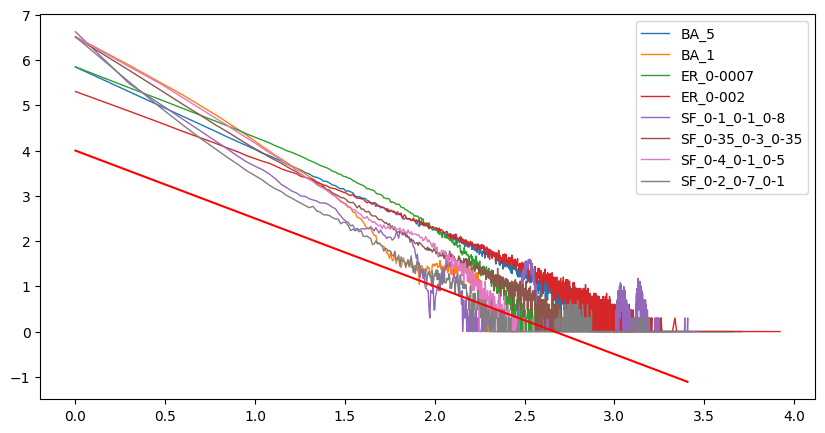

In [9]:
plt.figure(figsize=(10, 5))
for i in range(len(labels)):
    with open(f"temp_data/{labels[i]}.csv", "rb") as f:
        res = pd.read_csv(f)
    area = res.groupby("A", as_index=False).count()
    
    x, y = np.log10(area["A"]), np.log10(area["iteration"])
    plt.plot(x, y, label=labels[i], lw=1)
    

plt.plot(x, -1.5*x+4, c='r')
plt.legend()


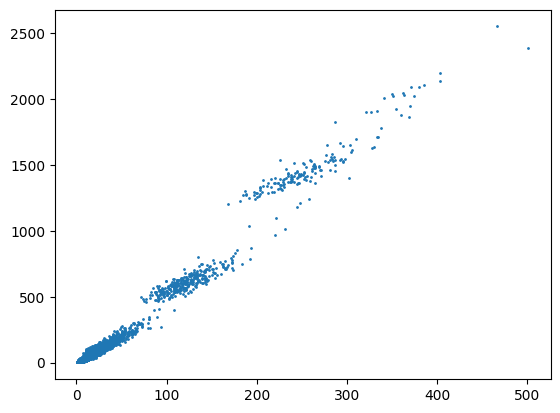

In [10]:
x, y = res["T"], res["A"]
plt.scatter(x, y, s=1)
#plt.plot(np.sort(x), np.sort(x)**1.5, c='r')